<a href="https://colab.research.google.com/github/shivam2001s/image-filter/blob/main/Home_loan_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd                       # for reading the files
import numpy as np                        # for creating multi-dimensional-array
import matplotlib.pyplot as plt           # for plotting
import seaborn as sns                     # for data visulization
import warnings
from statistics import mean
from sklearn import tree
from sklearn import metrics# for ignoring the warnings
warnings.filterwarnings("ignore")
%matplotlib inline
from sklearn.metrics import classification_report
#import scikitplot as skplt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import StratifiedKFold

In [3]:
test= pd.read_csv('/content/loan_sanction_test.csv')
train= pd.read_csv('/content/loan_sanction_train.csv')

In [ ]:
test.head()#  describe the number of top element.

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [4]:
test.shape #describe the row and column

(367, 12)

In [5]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
test_original= test.copy()
train_original= train.copy()

In [7]:
test.head(6)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
5,LP001054,Male,Yes,0,Not Graduate,Yes,2165,3422,152.0,360.0,1.0,Urban


In [ ]:
test.describe() # it give the information of integer value in dataset

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


In [8]:
test.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [10]:
test.info()#describe the information of dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [11]:
train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

<Axes: >

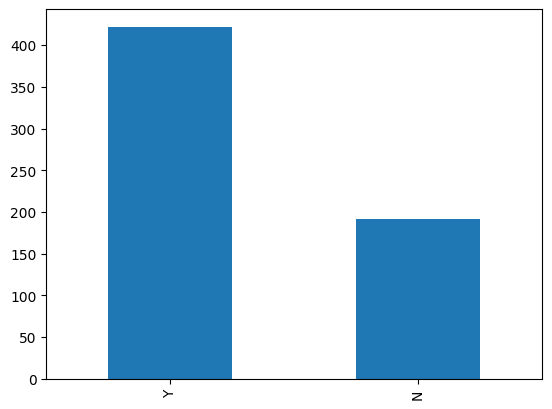

In [12]:
train['Loan_Status'].value_counts().plot.bar()

<Axes: title={'center': 'Credit_History'}>

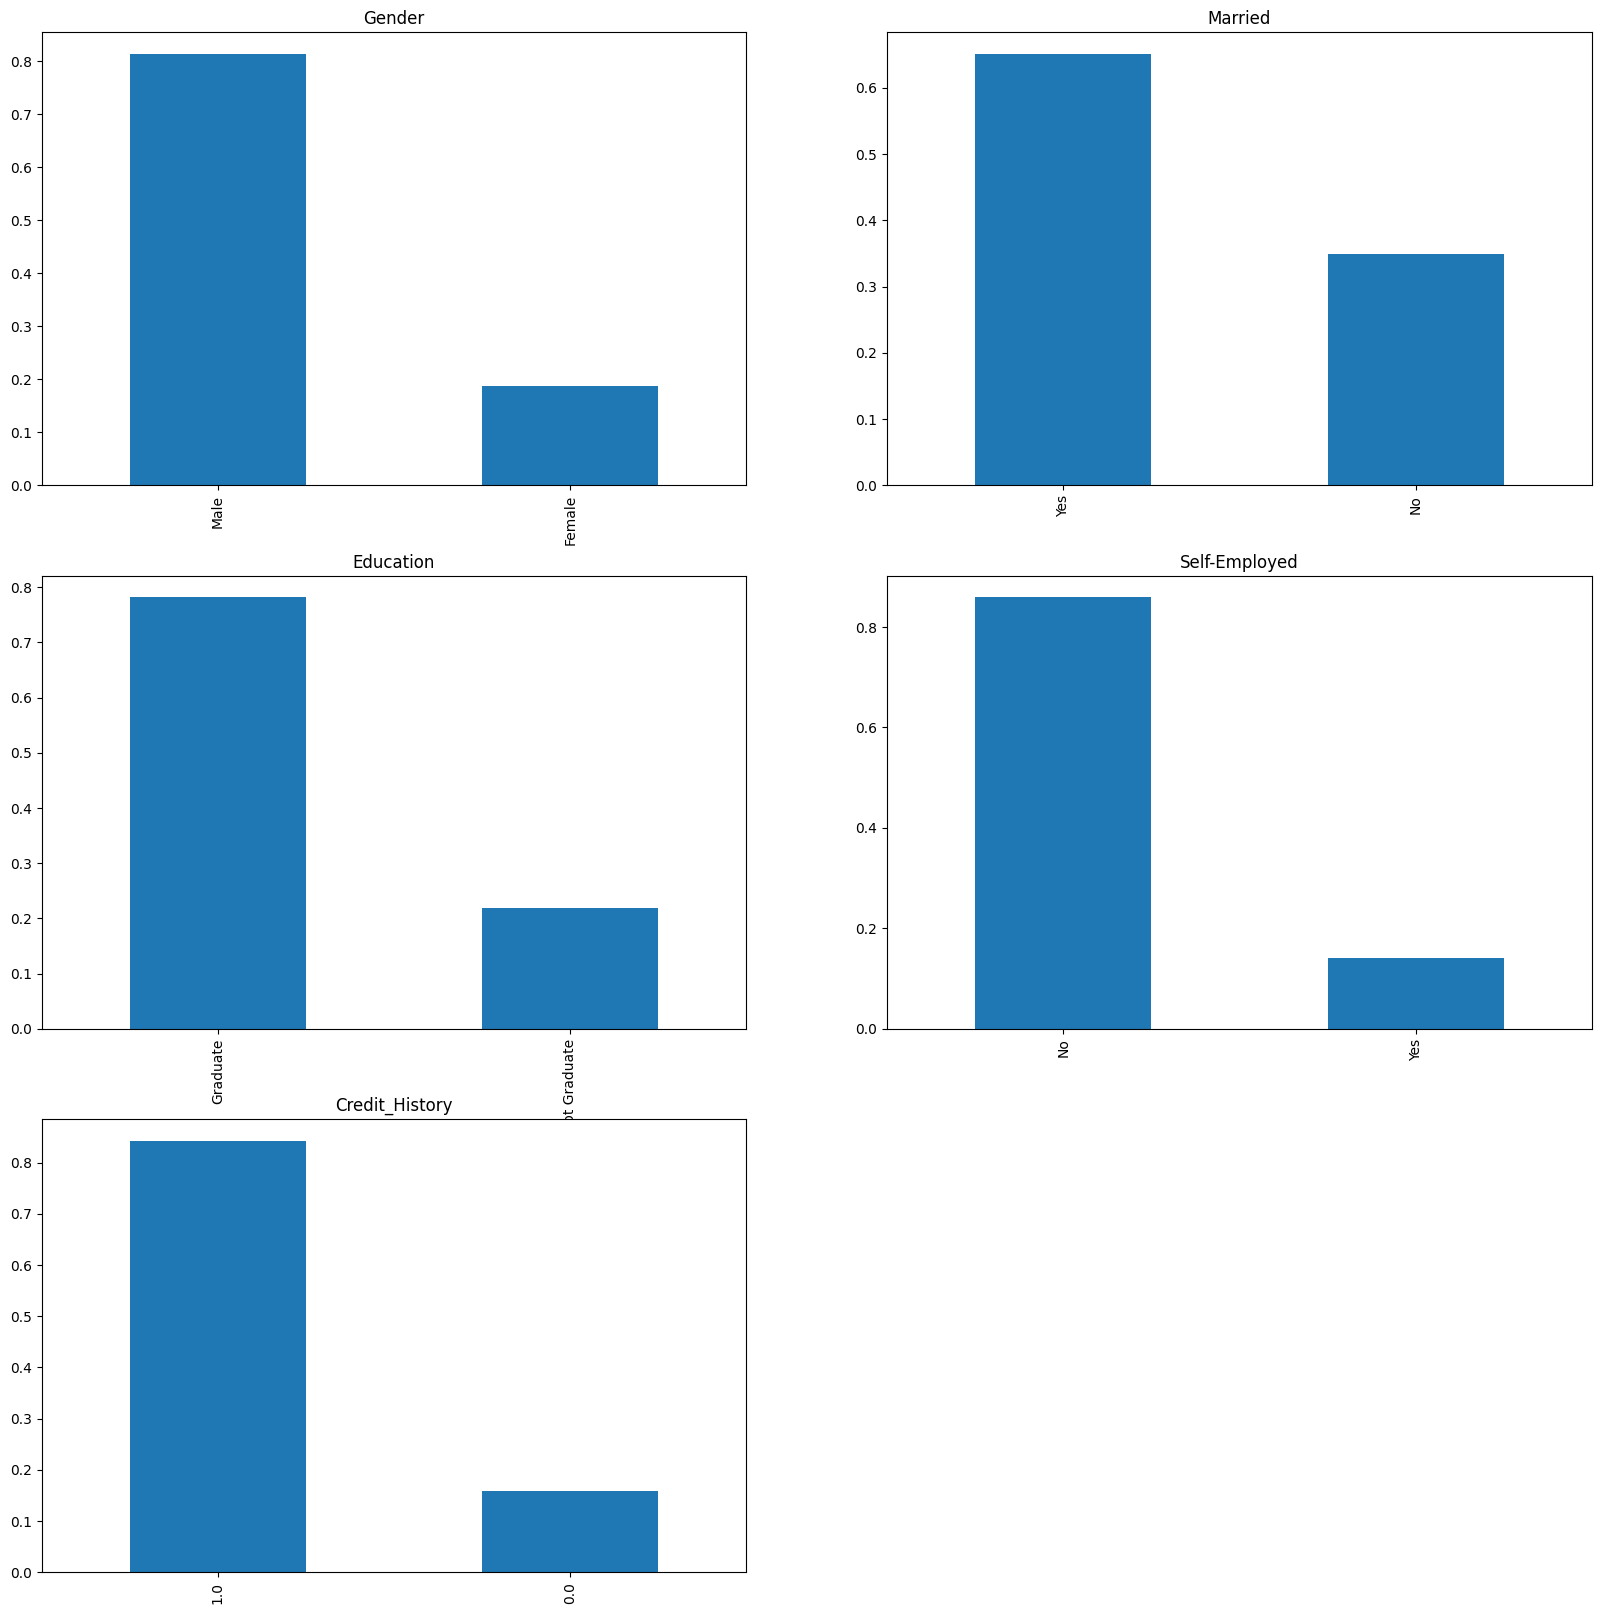

In [13]:
plt.figure()
plt.subplot(321)
train['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,20),title='Gender')

plt.subplot(322)
train['Married'].value_counts(normalize=True).plot.bar(figsize=(20,20),title='Married')

plt.subplot(323)
train['Education'].value_counts(normalize=True).plot.bar(figsize=(20,20),title='Education')

plt.subplot(324)
train['Self_Employed'].value_counts(normalize=True).plot.bar(figsize=(20,20),title='Self-Employed')

plt.subplot(325)
train['Credit_History'].value_counts(normalize=True).plot.bar(figsize=(20,20),title='Credit_History')

<Axes: title={'center': 'Property Area'}>

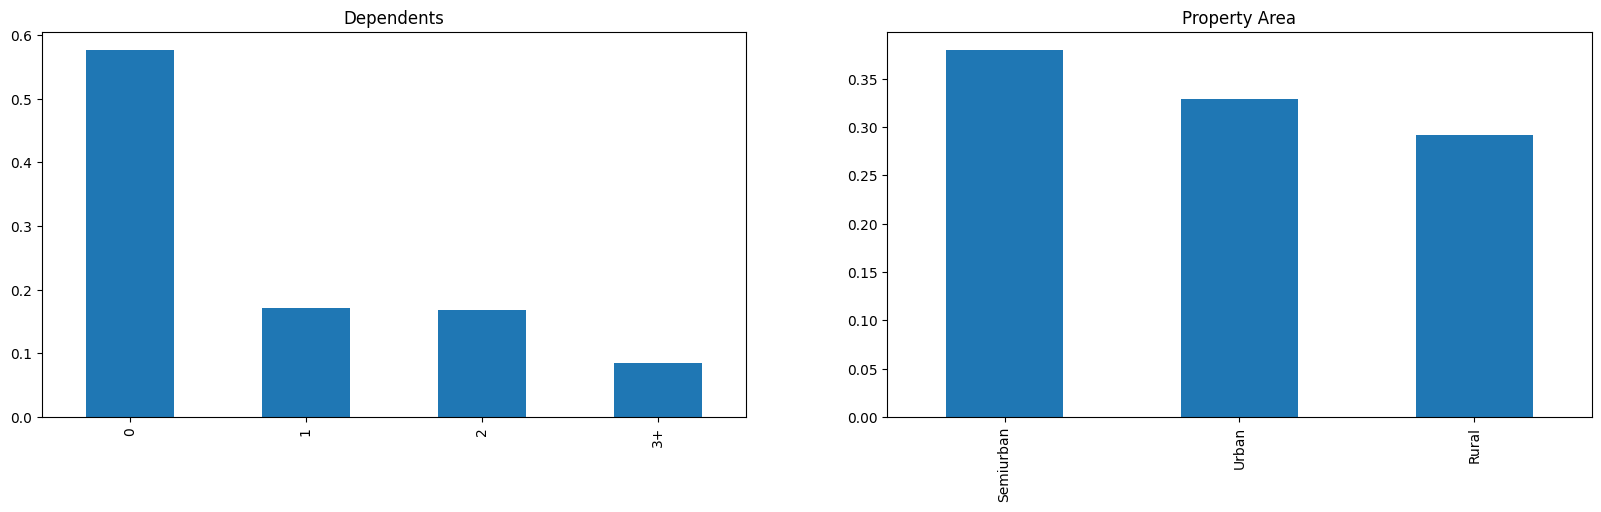

In [14]:
plt.figure()
plt.subplot(121)
train['Dependents'].value_counts(normalize=True).plot.bar(figsize=(20,5),title='Dependents')

plt.subplot(122)
train['Property_Area'].value_counts(normalize=True).plot.bar(figsize=(20,5),title='Property Area')

<Axes: >

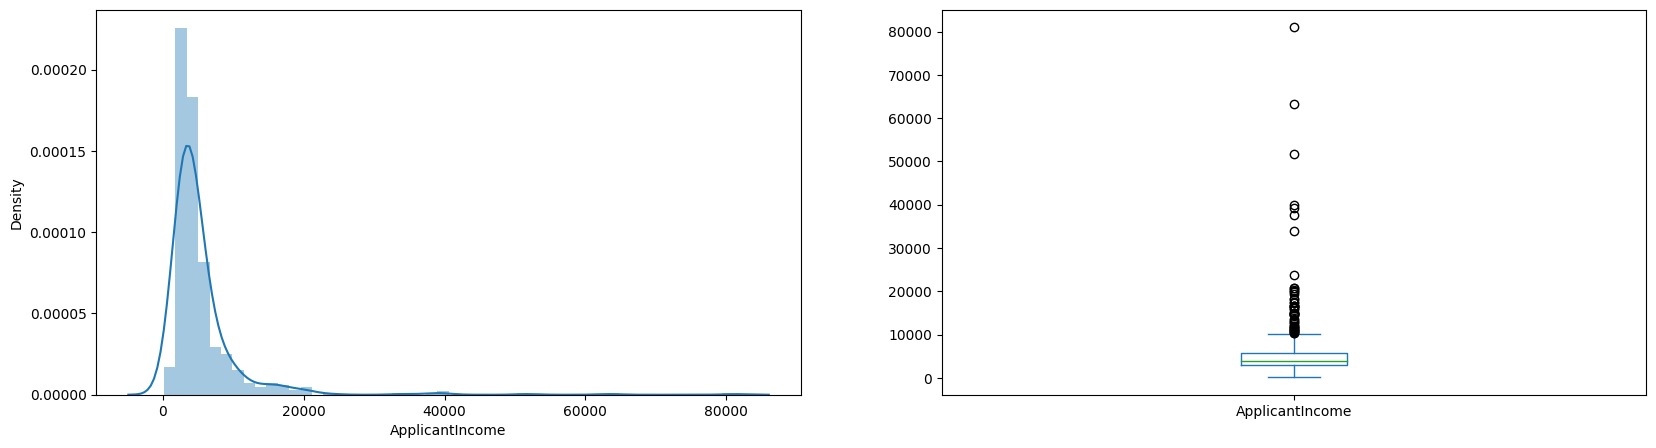

In [15]:
plt.subplot(121)
sns.distplot(train['ApplicantIncome'])
plt.subplot(122)
train['ApplicantIncome'].plot.box(figsize=(20,5))

Text(0.5, 0.98, '')

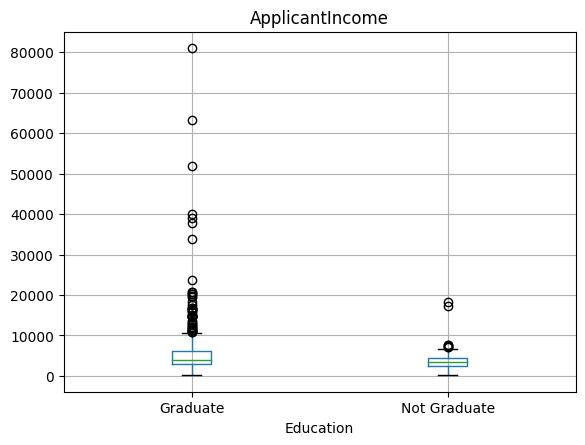

In [16]:
train.boxplot(column='ApplicantIncome',by='Education')
plt.suptitle("")

<Axes: >

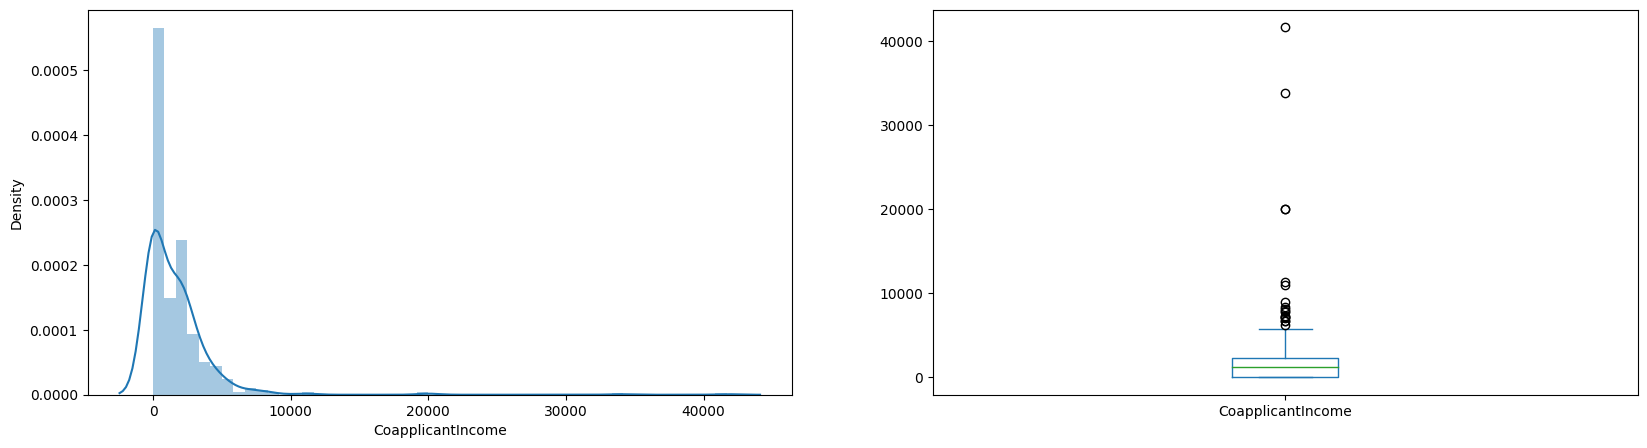

In [17]:
plt.subplot(121)
sns.distplot(train['CoapplicantIncome'])
plt.subplot(122)
train['CoapplicantIncome'].plot.box(figsize=(20,5))

<Axes: >

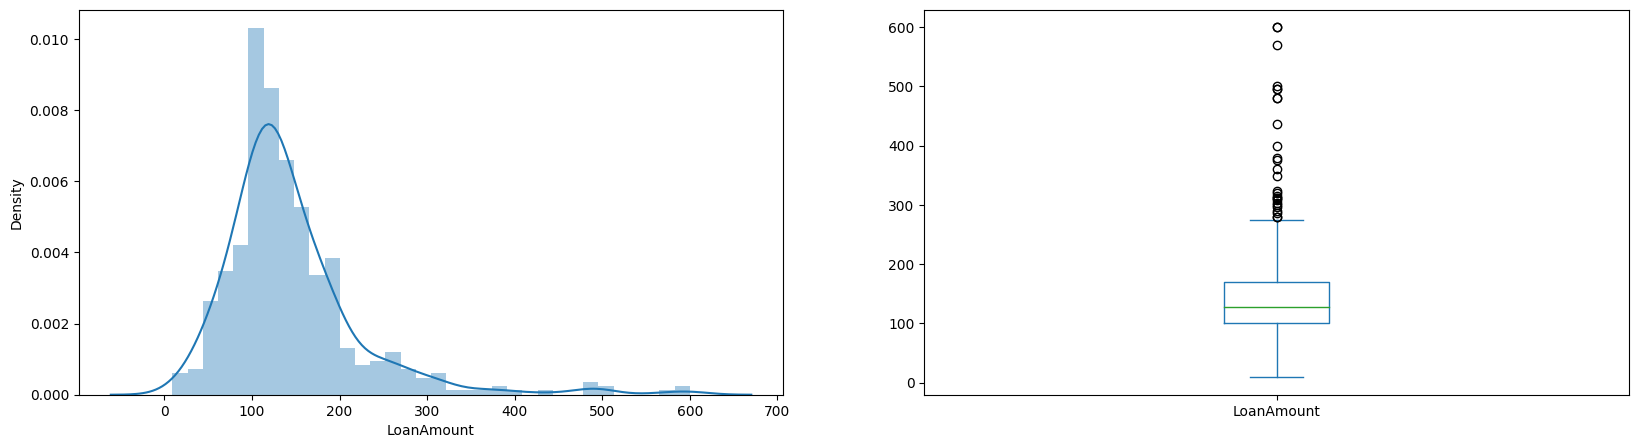

In [18]:
df=train.dropna()
plt.subplot(121)
sns.distplot(df['LoanAmount'])

plt.subplot(122)
df['LoanAmount'].plot.box(figsize=(20,5))

In [19]:
import plotly.express as px
import pandas as pd

# reading the database
data = pd.read_csv('/content/loan_sanction_train.csv')

# plotting the scatter chart
fig = px.line(data, y='LoanAmount', color='Gender')

# showing the plot
fig.show()

In [20]:
fig = px.bar(data,x='Dependents', y='LoanAmount', color='Gender')

# showing the plot
fig.show()

In [21]:
import plotly.graph_objects as px
import pandas as pd


data = pd.read_csv('/content/loan_sanction_train.csv')

plot = px.Figure(data=[px.Scatter(
    y=data['LoanAmount'],
    mode='lines',)
])

plot.update_layout(
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1,
                    step="day",
                    stepmode="backward"),
            ])
        ),
        rangeslider=dict(
            visible=True
        ),
    )
)

plot.show()

In [22]:
plot = px.Figure(data=[px.Scatter(
    y=data['Credit_History'],
    mode='lines',)
])

plot.update_layout(
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1,
                    step="day",
                    stepmode="backward"),
            ])
        ),
        rangeslider=dict(
            visible=True
        ),
    )
)

plot.show()

Bivariant Analysis

In [23]:
Gender=pd.crosstab(train['Gender'],train['Loan_Status'])
Gender

Loan_Status,N,Y
Gender,,
Female,37,75
Male,150,339


<Axes: xlabel='Gender'>

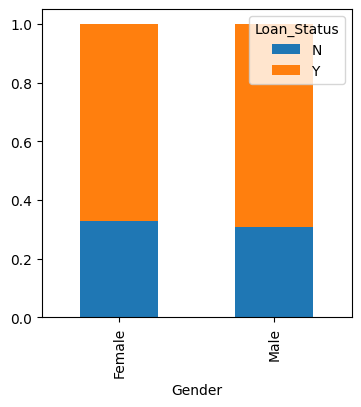

In [24]:
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

In [26]:
Married=pd.crosstab(train['Married'],train['Loan_Status'])
Married

Loan_Status,N,Y
Married,,
No,79,134
Yes,113,285


<Axes: xlabel='Married'>

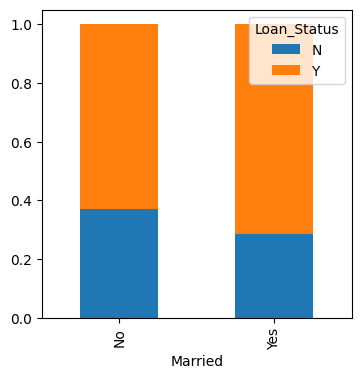

In [27]:
Married.div(Married.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

In [28]:
Dependents=pd.crosstab(train['Dependents'],train['Loan_Status'])
Dependents

Loan_Status,N,Y
Dependents,,
0,107,238
1,36,66
2,25,76
3+,18,33


<Axes: xlabel='Dependents'>

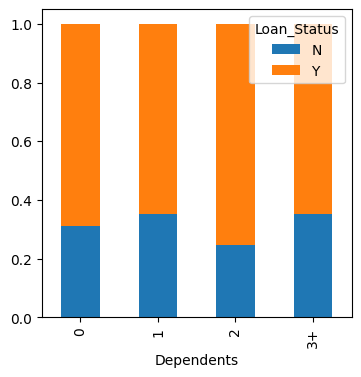

In [ ]:
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

In [29]:
Education= pd.crosstab(train['Education'],train['Loan_Status'])
Education

Loan_Status,N,Y
Education,,
Graduate,140,340
Not Graduate,52,82


<Axes: xlabel='Education'>

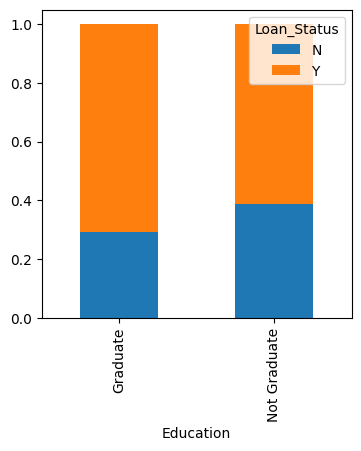

In [30]:
Education.div(Education.sum(1).astype(float),axis=0).plot(kind="bar", stacked=True, figsize=(4,4) )

In [31]:
Self_Employed= pd.crosstab(train['Self_Employed'],train['Loan_Status'])
Self_Employed

Loan_Status,N,Y
Self_Employed,,
No,157,343
Yes,26,56


<Axes: xlabel='Self_Employed'>

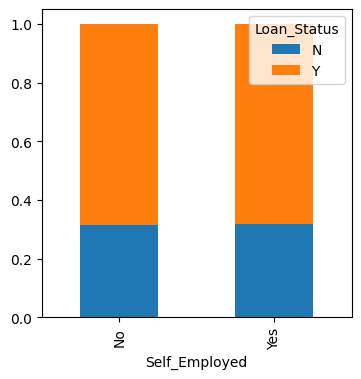

In [32]:
Self_Employed.div(Self_Employed.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))